1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)
z=np.mean(m)
print(z)
x=np.mean(m,axis=1)
print(x)
y=np.mean(m,axis=0)
print(y)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
5.5
[1.5 5.5 9.5]
[4. 5. 6. 7.]


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [4]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
z=np.outer(u, v)
print(z)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [14]:
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

matrix = np.zeros((4, 4))

for i in range(len(u)):
    for j in range(len(v)):
        matrix[i][j]= u[i] * v[j]
        
print(matrix)

[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]


In [21]:
u = np.array([1, 3, 5, 7]).reshape(4, 1)
v = np.array([2, 4, 6, 8]).reshape(4, 1)

final = u @ v.T

print(final)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [36]:
import numpy.ma as ma
high = 3
low = 0
m,n = 10,6

a = (high - low)*np.random.rand(m,n) + low
print(a)
print()
print(ma.filled(ma.masked_where(a <= .3, a).astype(float), .0))

[[0.73760573 2.15762299 1.36334253 2.73953105 0.27833945 1.48132155]
 [0.44664681 1.85549607 1.88586481 2.34596732 2.69226992 0.06736928]
 [2.15853033 0.15504671 2.92330727 2.3169344  0.98097798 2.82020982]
 [2.60564743 0.08366513 0.66783283 1.72963697 2.32809474 1.67402846]
 [0.4261955  1.19030114 2.09600887 2.50839433 2.54222393 2.94451907]
 [2.97276893 1.28990182 1.03556638 1.05126257 2.41733848 2.13350986]
 [1.19722236 0.92138449 1.74562301 1.25130229 1.65632063 0.15886427]
 [1.04037936 0.64445407 2.20836945 0.62955633 0.61792579 0.84645636]
 [1.63464481 1.16749205 2.73258644 1.47993856 1.13395418 0.85525509]
 [1.50887363 1.38190718 2.37064977 0.10123882 0.27956434 0.46161652]]

[[0.73760573 2.15762299 1.36334253 2.73953105 0.         1.48132155]
 [0.44664681 1.85549607 1.88586481 2.34596732 2.69226992 0.        ]
 [2.15853033 0.         2.92330727 2.3169344  0.98097798 2.82020982]
 [2.60564743 0.         0.66783283 1.72963697 2.32809474 1.67402846]
 [0.4261955  1.19030114 2.096008

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

In [18]:
import numpy as np
import math
x = np.linspace(0, 2 * np.pi, 100)
# print(x)
# print()
# every_10rd = x[::10]
# print(every_10rd)
# print()
# reverse_array = x[::-1]
# print(reverse_array)
# print()
x[abs(np.sin(x)-np.cos(x))>=0.1] = 0
print(x)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.76159822 0.82506474 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         3.87145761 3.93492413 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


(5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [75]:
def mult_table(n):
    rng = np.arange(1, n+1)
    return rng * rng[:, None]
print(mult_table(10))
print("trace of the matrix=", np.matrix.trace(mult_table(10)))
arr=np.array(mult_table(10))
print("anti-diagonal=",np.fliplr(arr).diagonal())
upwards=np.diag(mult_table(10), k=1)
print("upwards=",upwards)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
trace of the matrix= 385
anti-diagonal= [10 18 24 28 30 30 28 24 18 10]
upwards= [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [109]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544,1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array
print("\ndistance: \n",distance_array)
print("\n Converted from miles in: \n", distance_array/0.62137119)


distance: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

 Converted from miles in: 
 [[   0.          318.65011315  487.63123376 1184.47718826 1401.73862905
  1890.97920681 2373.78240855 2484.82714495 3078.67508309 3939.67412619]
 [ 318.65011315    0.          168.98112061  865.82707512 1083.0885159
  1572.32909366 2055.1322954  2166.1770318  2760.02496994 3621.02401304]
 [ 487.63123376  168.98112061    0.          696.84595451  914.10739529
  1403.34797305 1886.15117479 1997.19591119 2591.04384933 3452.042

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [112]:
from math import pow, ceil
import timeit
def sieve(n):
    N = [True for i in range(n+1)]
    N[1] = False
    primes = []
    for i in range(2, ceil(pow(n, 0.5))+1):
        if N[i]:
            for j in range(i*i, n+1, i):
                N[j] = False
    for i in range(2, n+1):
        if N[i]:
           primes.append(i)
    return primes

n = int(input("Enter n: \n"))
print(sieve(n))
print(timeit.timeit('sieve(n)', globals=globals(), number=99))

[2, 3, 5, 7, 11]
0.00038610000046901405


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

[[-1 -1 -1 ...  1  1 -1]
 [-1 -1 -1 ...  1 -1 -1]
 [ 1  1 -1 ...  1 -1 -1]
 ...
 [ 1  1  1 ... -1  1  1]
 [-1 -1  1 ...  1 -1 -1]
 [ 1  1  1 ... -1 -1  1]]

 [  8   8  28  20   2   6  -8  26   6  12  -8 -12 -16  -2 -22  -8  14  -8
 -16 -24 -18   4   4  10  10 -10   2   2 -22   0   2 -16 -16  20  -2 -16
   2  -8   2   0   8  10 -10 -18   2  -2  10   6   0   8  -2  10 -12  26
   2 -22  -2 -14  -4  -8  -4 -18  16   6   4  -6   4  -4 -10   6  22  -6
  -8 -24 -12   4  -2 -22  -4 -10 -14 -22  26 -18 -10  24  34  -4  16   2
  18 -10 -18  12  -4   2   8 -10   0  16  18  -8  -8 -24   8   0  12  16
  36  -4   6 -10   8 -10   2   4  -4  16  12   6 -12  -6   2  -8  -4  -4
  -4  -4  28   2  10   0  -6   2  10 -16  26   2  -6   6  28 -10 -10   8
  -6   0 -22  10 -20  -8   4  -4   0 -26  28  -8   4  -6   8   8  -2 -10
  36 -38  12  18  -6   6  -8  12  -8  -2  18 -10  -2  12   6  -8   4  14
   4  14  -6  -6 -18   6  10  -2   4   8 -20   0   8  -6   6  36   0  20
  -2  10  12  -2  24 -24  12  -8  16  -

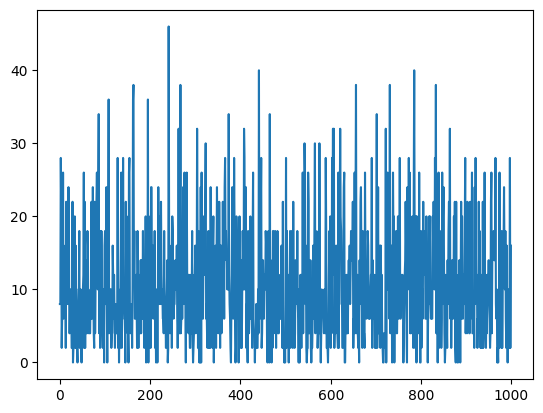

In [20]:
from pylab import *
u = 2 * randint(0, 2, size=(1000, 200))-1
print(u)
walking_distance = u.sum(1)
print("\n", u.sum(1))   # the walking distance for each walker
walking_distances_square = np.square(walking_distance)
print("\n", walking_distances_square)   # the square of the previously-obtained array (element-wise)
mean_distance_square = []
mean = 0
for i in walking_distances_square:
    mean += i
    mean_distance_square.append(np.mean(mean))
print(mean_distance_square)
distances = np.sqrt(walking_distances_square)
m = np.arange(0, len(distances))
plt.plot(m, distances)
plt.show()